# Project: Ford GoBike Data Analysis
## by Hagop Bozawglanian

## Preliminary Wrangling

The data set I will be using includes information about rides made in a bike-sharing system in the San Fransisco, Bay Area from June 28, 2017 to December 31, 2017.

This data set includes columns for the following:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – "Subscriber" = Member or "Customer" = Casual)
- Member Year of Birth
- Member Gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

In [2]:
#import data
df_bike = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
#validate import - high level overview
print(df_bike.shape)
print(df_bike.info())

(519700, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB
None


In [4]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [5]:
#high level stats
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


### Cleaning

In [6]:
df_clean = df_bike.copy()

In [7]:
#check for duplicates
df_clean.duplicated().sum()

0

In [8]:
#check for null values
df_clean.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

**Check values for columns I care about**

In [9]:
#Check values for columns I care about
print(df_clean.start_station_id.nunique())
print(df_clean.end_station_id.nunique())
print(df_clean.user_type.nunique())
print(df_clean.member_birth_year.nunique())
print(df_clean.member_gender.nunique())

272
272
2
73
3


In [10]:
#Check values for columns I care about
print(df_clean.start_station_id.unique())
print(df_clean.end_station_id.unique())
print(df_clean.user_type.unique())
print(df_clean.member_birth_year.unique())
print(df_clean.member_gender.unique())

[ 74 284 245  60 239  30 259  20  67  66  14  78   4 317 139   6 323  49
 251   7  96 278 182  98  19  42  85 124 249   8  45  58 127 132 230  27
 121 134  10  23 126 119 202 163  41  28  53  33  48  16  11 277 160 147
 125 133 200 167  35  99  81 232  52  86  61 210  97  93 180 197  37 129
 196  77  47   3 324 311  70  13 186 276 307 176 241 280 112 108 113  95
  90  31  34  44  26 118  22 285 212  71  15 223  75 318 240  89 120 274
 114 115 195  72   5 137  79 153 258 130 301 296 321 254  18 152 211 109
  25  36 123 183 102  43 235  80 156  88 297 107 144 158 201  55 181 105
  29  40 237 282  59 162  17 173 172 148 204  62 193 246  76 207 270  24
 100 266 122 194 238 263  64 145 243  21  84 188  56 189 279 250 175 178
 291 141 146 164 305 220 294 286 106   9  63 192 283 327 110 295 269 248
 191 157 221 214 340 209 247 205 101 170 227 116 308 304 312 206 314 174
  39 226 138 216 198 179 208 299 244 316 233 150 275 310 337 338 267  46
 159 213 218 190 140 222 293 289 177 215 281 154 16

#### Issues

1. Drop unnecessary columns: 
   - start_station_name         
   - start_station_latitude     
   - start_station_longitude    
   - end_station_name           
   - end_station_latitude       
   - end_station_longitude      
   - bike_id      
2. remove 'nan' in member_gender
3. remove 'nan' in member_birth_year
4. convert start_time and end_time to date-time
5. convert member_birth_year to int
6. clean outliers in member_birth_year
7. member_birth_year column contain values as years, it should renamed to member_age and the values should be calculated

**Define**

Remove unnecessary columns:
- start_station_name         
- start_station_latitude     
- start_station_longitude    
- end_station_name           
- end_station_latitude       
- end_station_longitude      
- bike_id  

**Code**

In [11]:
# drop the listed columns from trip_data_clean
df_clean = df_clean.drop(columns=['start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id']);

**Test**

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 8 columns):
duration_sec         519700 non-null int64
start_time           519700 non-null object
end_time             519700 non-null object
start_station_id     519700 non-null int64
end_station_id       519700 non-null int64
user_type            519700 non-null object
member_birth_year    453159 non-null float64
member_gender        453238 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 31.7+ MB


**Define**

Remove rows with na in member_gender and member_birth_year

**Code**

In [13]:
#drop rows with null values
df_clean.dropna(inplace=True)

**Test**

In [14]:
df_clean.isnull().sum()

duration_sec         0
start_time           0
end_time             0
start_station_id     0
end_station_id       0
user_type            0
member_birth_year    0
member_gender        0
dtype: int64

**Define**

Convert start_time and end_time to date-time.

**Code**

In [15]:
#convert the data type to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

**Test**

In [16]:
#check the data type of start_time and end_time
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 8 columns):
duration_sec         453159 non-null int64
start_time           453159 non-null datetime64[ns]
end_time             453159 non-null datetime64[ns]
start_station_id     453159 non-null int64
end_station_id       453159 non-null int64
user_type            453159 non-null object
member_birth_year    453159 non-null float64
member_gender        453159 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 31.1+ MB


**Define**

Convert member_birth_year to int from float.

**Code**

In [17]:
#convert flot to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int64')

**Test**

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 8 columns):
duration_sec         453159 non-null int64
start_time           453159 non-null datetime64[ns]
end_time             453159 non-null datetime64[ns]
start_station_id     453159 non-null int64
end_station_id       453159 non-null int64
user_type            453159 non-null object
member_birth_year    453159 non-null int64
member_gender        453159 non-null object
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 31.1+ MB


**Define**

Change 1886 to 1986 in member_birth_year.

**Code**

In [19]:
#how many 1886 entried are there
df_clean.loc[df_clean['member_birth_year'] == 1886]

,duration_sec,start_time,end_time,start_station_id,end_station_id,user_type,member_birth_year,member_gender
425817,2546,2017-08-19 17:47:32.110,2017-08-19 18:29:58.825,197,172,Customer,1886,Male
426608,1767,2017-08-19 13:20:02.170,2017-08-19 13:49:29.735,235,197,Customer,1886,Male


In [20]:
#change member_birth_year values from 1886 to 1986
df_clean['member_birth_year'].replace(1886, 1986,inplace=True)

**Test**

In [21]:
#how many 1886 entried are there
df_clean.loc[df_clean['member_birth_year'] == 1886]

,duration_sec,start_time,end_time,start_station_id,end_station_id,user_type,member_birth_year,member_gender


**Define**

It's okay to have the member birth year, but its more useful to look into the age of the members, so we can transform this using their year of birth.

**Code**

In [22]:
#add new column member_age
df_clean['member_age'] = 0

In [23]:
#convert birth year to age in years
year_of_data = 2017
df_clean['member_age'] = year_of_data - df_clean['member_birth_year']

**Test**

In [24]:
#check column name change
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 9 columns):
duration_sec         453159 non-null int64
start_time           453159 non-null datetime64[ns]
end_time             453159 non-null datetime64[ns]
start_station_id     453159 non-null int64
end_station_id       453159 non-null int64
user_type            453159 non-null object
member_birth_year    453159 non-null int64
member_gender        453159 non-null object
member_age           453159 non-null int64
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 34.6+ MB


In [25]:
#check ages
members = df_clean.member_age.unique()
sorted(members)

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 82,
 83,
 84,
 89,
 93,
 106,
 110,
 115,
 116,
 117]

In [26]:
#checking the birth year of one of the outliers
df_clean.query('member_age == 117')

,duration_sec,start_time,end_time,start_station_id,end_station_id,user_type,member_birth_year,member_gender,member_age
287,581,2017-12-31 18:10:46.556,2017-12-31 18:20:28.352,274,173,Subscriber,1900,Male,117
1751,370,2017-12-30 17:17:54.969,2017-12-30 17:24:05.481,207,173,Subscriber,1900,Male,117
3119,457,2017-12-29 18:24:08.722,2017-12-29 18:31:46.008,207,173,Subscriber,1900,Male,117
3259,613,2017-12-29 17:20:22.096,2017-12-29 17:30:35.527,173,207,Subscriber,1900,Male,117
5246,271,2017-12-28 16:48:41.310,2017-12-28 16:53:12.645,158,173,Subscriber,1900,Male,117
9838,571,2017-12-25 22:03:23.328,2017-12-25 22:12:54.959,176,173,Subscriber,1900,Male,117
10712,505,2017-12-24 17:05:39.482,2017-12-24 17:14:05.187,274,173,Subscriber,1900,Male,117
13035,402,2017-12-22 15:26:22.805,2017-12-22 15:33:05.766,173,176,Subscriber,1900,Male,117
14779,324,2017-12-21 18:29:15.588,2017-12-21 18:34:39.896,158,173,Subscriber,1900,Male,117
15948,247,2017-12-21 12:58:29.173,2017-12-21 13:02:36.839,158,176,Subscriber,1900,Male,117


In [27]:
#remove member_birth_year column
df_clean = df_clean.drop(columns=['member_birth_year']);

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 8 columns):
duration_sec        453159 non-null int64
start_time          453159 non-null datetime64[ns]
end_time            453159 non-null datetime64[ns]
start_station_id    453159 non-null int64
end_station_id      453159 non-null int64
user_type           453159 non-null object
member_gender       453159 non-null object
member_age          453159 non-null int64
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 31.1+ MB


### Categorization

- categorize the member_age: 
  - 18-24
  - 25-34
  - 35-44
  - 45-54
  - 55-64
  - 65-74
  - 75+
- categorize dates to months

In [29]:
#categorize start_time and end_time into months in new month_categories columns
df_clean['start_month'] = pd.DatetimeIndex(df_clean['start_time']).month
df_clean['end_month'] = pd.DatetimeIndex(df_clean['end_time']).month

In [30]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,user_type,member_gender,member_age,start_month,end_month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,43,Customer,Male,30,12,1
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,96,Customer,Female,52,12,1
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,247,Subscriber,Female,20,12,1
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,259,Customer,Female,26,12,1
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,24,Subscriber,Male,27,12,1


In [31]:
#categorize member_age into a new column called 'member_age_range'
bins = [18, 25, 35, 45, 55, 65, 75, np.inf]
age_categories = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
df_clean['member_age_range'] = pd.cut(df_clean['member_age'], bins, labels = age_categories)

In [32]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,user_type,member_gender,member_age,start_month,end_month,member_age_range
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,43,Customer,Male,30,12,1,25-34
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,96,Customer,Female,52,12,1,45-54
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,247,Subscriber,Female,20,12,1,18-24
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,259,Customer,Female,26,12,1,25-34
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,24,Subscriber,Male,27,12,1,25-34


In [33]:
#drop the start_time and end_time column
df_clean = df_clean.drop(columns=['start_time', 'end_time']);

In [34]:
df_clean.head()

,duration_sec,start_station_id,end_station_id,user_type,member_gender,member_age,start_month,end_month,member_age_range
0,80110,74,43,Customer,Male,30,12,1,25-34
1,78800,284,96,Customer,Female,52,12,1,45-54
4,43603,239,247,Subscriber,Female,20,12,1,18-24
6,4507,259,259,Customer,Female,26,12,1,25-34
12,2183,67,24,Subscriber,Male,27,12,1,25-34


In [35]:
#reorder the columns of the dataframe
df_clean = df_clean[['start_station_id', 'start_month', 'end_station_id', 'end_month', 'duration_sec', 'user_type', 'member_age', 'member_age_range', 'member_gender']]

In [36]:
#validate import - high level overview
print(df_clean.shape)
print(df_clean.info())

(453159, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 9 columns):
start_station_id    453159 non-null int64
start_month         453159 non-null int64
end_station_id      453159 non-null int64
end_month           453159 non-null int64
duration_sec        453159 non-null int64
user_type           453159 non-null object
member_age          453159 non-null int64
member_age_range    452260 non-null category
member_gender       453159 non-null object
dtypes: category(1), int64(6), object(2)
memory usage: 31.5+ MB
None


In [37]:
df_clean.head()

,start_station_id,start_month,end_station_id,end_month,duration_sec,user_type,member_age,member_age_range,member_gender
0,74,12,43,1,80110,Customer,30,25-34,Male
1,284,12,96,1,78800,Customer,52,45-54,Female
4,239,12,247,1,43603,Subscriber,20,18-24,Female
6,259,12,259,1,4507,Customer,26,25-34,Female
12,67,12,24,1,2183,Subscriber,27,25-34,Male


In [38]:
df_clean.nunique()

start_station_id     272
start_month            7
end_station_id       272
end_month              8
duration_sec        7972
user_type              2
member_age            72
member_age_range       7
member_gender          3
dtype: int64

In [39]:
df_clean.describe()

,start_station_id,start_month,end_station_id,end_month,duration_sec,member_age
count,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000
mean,95.046132,9.779947,91.854907,9.779733,832.934014,36.594771
std,84.578497,1.560167,83.053529,1.560756,2525.280717,10.511623
min,3.000000,6.000000,3.000000,1.000000,61.000000,18.000000
25%,25.000000,9.000000,24.000000,9.000000,364.000000,29.000000
50%,67.000000,10.000000,66.000000,10.000000,556.000000,34.000000
75%,138.000000,11.000000,134.000000,11.000000,838.000000,43.000000
max,340.000000,12.000000,340.000000,12.000000,86252.000000,117.000000


In [40]:
#save clean data to a csv file
df_clean.to_csv('clean_data.csv', index=False)

### What is the structure of your dataset?

We have 453,159 rows across 9 columns.

The mapping of column descriptions to the columns names:

Column Name               - Description  
- start_station_id        - Start Station ID
- start_month             - Month of Start Time
- end_station_id          - End Station ID
- end_month               - Month of End Time
- duration_sec            - Trip Duration (seconds)
- user_type               - User Type (Subscriber or Customer – "Subscriber" = Member or "Customer" = Casual)
- member_age              - Age of the Year
- member_age_range        - Category of the Ages
- member_gender           - Member Gender

The data covers:

- 272 start stations
- 272 end stations
- 7 start month categories: Jun 2017 to Dec 2017
- 8 end month categories: Jun 2017 to Jan 2018
- 2 user types: Customer and Subscriber
- 7 age ranges: 18-24, 25-34, 35-44, 45-54, 55-64, 65-74, 75+
- 3 gender types: Male, Female, and Other


### What is/are the main feature(s) of interest in your dataset?

1. Do people end trips where they started?
2. What is the length of the average trip?
3. What is the distribution of riders in terms of gender and age?
4. Are there more subscribers or customers?
5. Which month had the most customers/subscribers?
6. What is the proportion of subscribers vs customers for the age ranges?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. start_station_id (1) 
2. end_station_id (1) 
3. duration_sec (2)
4. start_month (5) 
5. end_month (5)
6. user_type(4, 6)
7. member_age_range (3, 6)
8. member_gender (3)
9. member_age (3)

## Univariate Exploration


In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 9 columns):
start_station_id    453159 non-null int64
start_month         453159 non-null int64
end_station_id      453159 non-null int64
end_month           453159 non-null int64
duration_sec        453159 non-null int64
user_type           453159 non-null object
member_age          453159 non-null int64
member_age_range    452260 non-null category
member_gender       453159 non-null object
dtypes: category(1), int64(6), object(2)
memory usage: 31.5+ MB


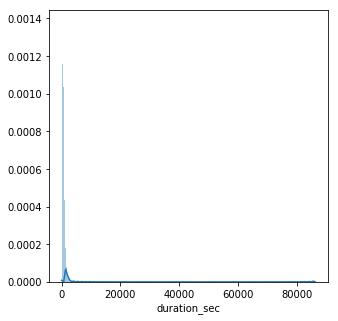

In [42]:
#count of durations
plt.figure(figsize=(5,5))
sb.distplot(df_clean.duration_sec, bins=1000);

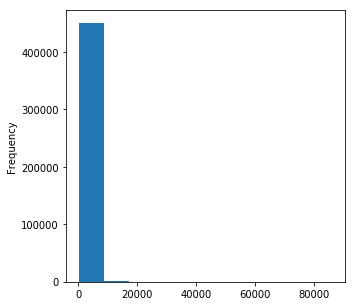

In [43]:
#count of durations
plt.figure(figsize=(5,5))
df_clean.duration_sec.plot(kind = 'hist');

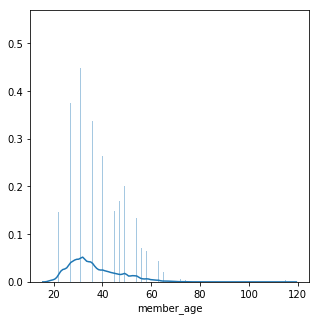

In [44]:
#count of ages
plt.figure(figsize=(5,5))
sb.distplot(df_clean.member_age, bins=1000);

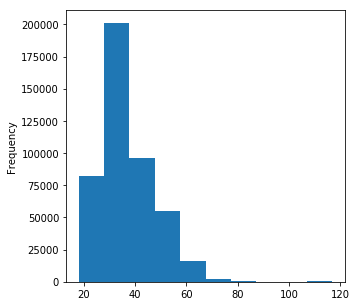

In [45]:
#count of ages 
plt.figure(figsize=(5,5))
df_clean.member_age.plot(kind = 'hist');

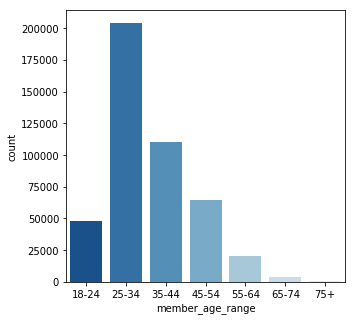

In [46]:
#count of age ranges
plt.figure(figsize=(5,5))
sb.countplot(data = df_clean, x = 'member_age_range', palette = "Blues_r");

We can see from the distribution that there is a vast difference in the 25-34 year age group, which is is almost double any other category.

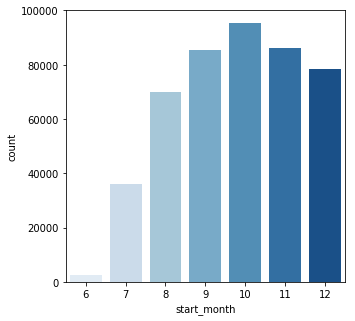

In [47]:
#count plot of start_month
plt.figure(figsize=(5,5))
sb.countplot(data = df_clean, x = 'start_month', palette = "Blues");

We can see that there were more rides started after September.

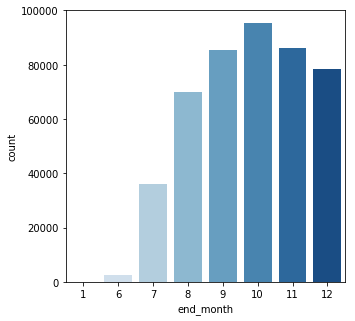

In [48]:
#count plot of end_month
plt.figure(figsize=(5,5))
sb.countplot(data = df_clean, x = 'end_month', palette = "Blues");

We can see that there were more rides ended after September.

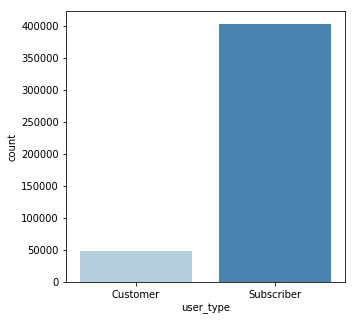

In [49]:
#count plot of user_type
plt.figure(figsize=(5,5))
sb.countplot(data = df_clean, x = 'user_type', palette = "Blues");

We can see that there are notably more users as subscribers than there are as customers.

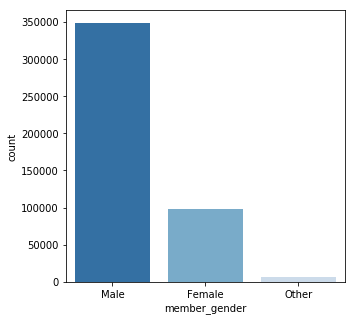

In [50]:
#count plot of member_gender
plt.figure(figsize=(5,5))
sb.countplot(data = df_clean, x = 'member_gender', palette = "Blues_r");

We can see that there is a significantly larger amount of Male users than the other two categories.

### What is the length of the average trip? 

In [51]:
df_clean.duration_sec.mean()

832.9340143305109

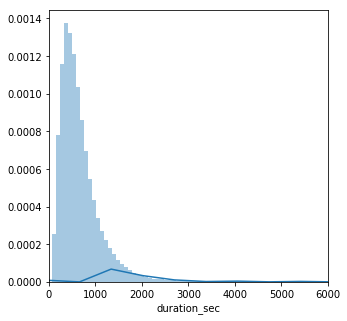

In [52]:
#count of durations
plt.figure(figsize=(5,5))
plt.xlim(1,6000)
sb.distplot(df_clean.duration_sec, bins=1000);

**Result**

The average trip is 832.93 seconds long.

### Are there more subscribers or customers?

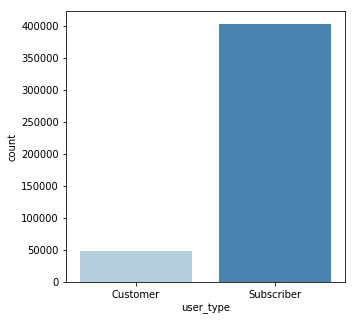

In [53]:
#count plot of user_type
plt.figure(figsize=(5,5))
sb.countplot(data = df_clean, x = 'user_type', palette = "Blues");

In [54]:
df_clean.user_type.value_counts()

Subscriber    404424
Customer       48735
Name: user_type, dtype: int64

**Result**

There are a lot more users who are subscribers compared to customers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the beginning of the cleaning I had already taken out some of the unusual points. The only one that I can see a potential issue is the duration that covers over 20 hours, but it might have been a user who used the bike all day. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

From the beginning I tidied the data by categorizing the data into buckets for things like the ages and the months. I also removed all na columns as described in the cleaning section above.

## Bivariate Exploration

In this section, investigate relationships between pairs of variables in your
data.

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 9 columns):
start_station_id    453159 non-null int64
start_month         453159 non-null int64
end_station_id      453159 non-null int64
end_month           453159 non-null int64
duration_sec        453159 non-null int64
user_type           453159 non-null object
member_age          453159 non-null int64
member_age_range    452260 non-null category
member_gender       453159 non-null object
dtypes: category(1), int64(6), object(2)
memory usage: 51.5+ MB


In [56]:
#define numeric and categoric variables
numeric_vars = ['member_age', 'duration_sec']
categoric_vars = ['start_month', 'end_month', 'user_type', 'member_age_range', 'member_gender']

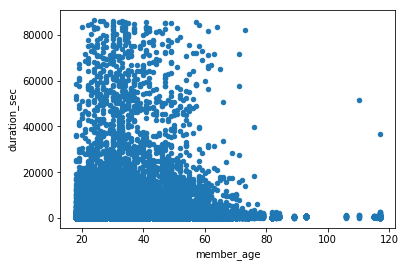

In [57]:
#scatter plot of member_age vs duration_sec
df_clean.plot.scatter(x = 'member_age', y = 'duration_sec');

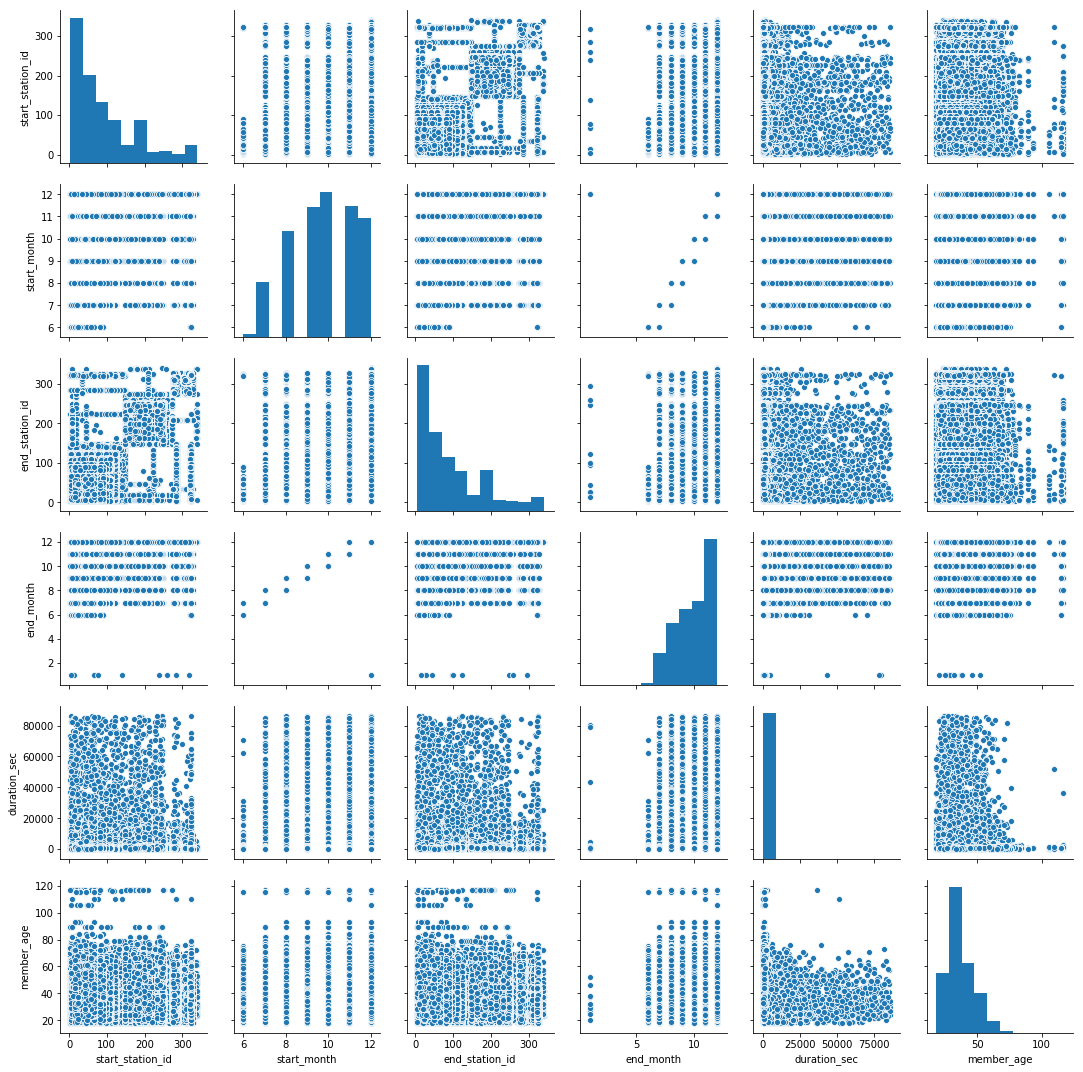

In [58]:
#pair plot of all numeric variables
sb.pairplot(df_clean);

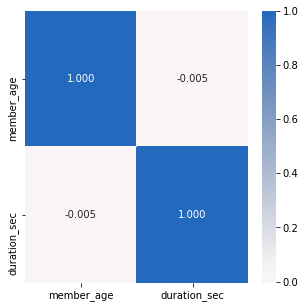

In [59]:
#heat map plot of numeric_vars
plt.figure(figsize=(5,5))
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

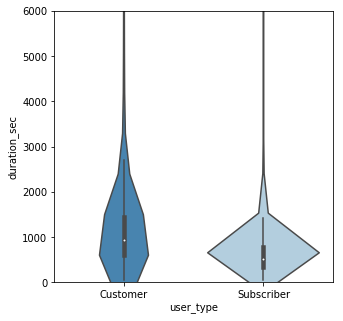

In [60]:
#violin plot of user_type vs duration_sec
plt.figure(figsize=(5,5))
plt.ylim(1,6000)
sb.violinplot(x = 'user_type', y = 'duration_sec', data = df_clean, palette = 'Blues_r');

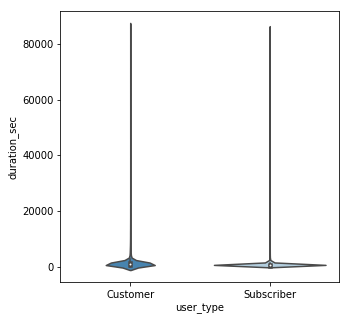

In [61]:
#violin plot of user_type vs duration_sec
plt.figure(figsize=(5,5))
sb.violinplot(x = 'user_type', y = 'duration_sec', data = df_clean, palette = 'Blues_r');

**Result**

We can see from the violin plot that the subscriber base has a higher rate of short trips, while customers tend to more more spread more towards the longer end.

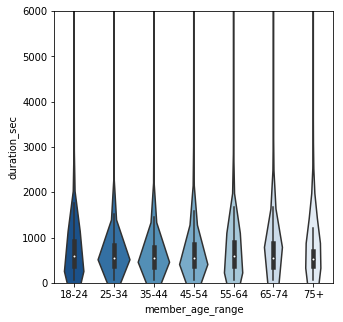

In [62]:
#violin plot of member_age_range vs duration_sec
plt.figure(figsize=(5,5))
plt.ylim(1,6000)
sb.violinplot(x = 'member_age_range', y = 'duration_sec', data = df_clean, palette = 'Blues_r');

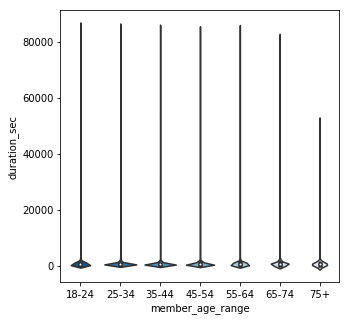

In [63]:
#violin plot of member_age_range vs duration_sec
plt.figure(figsize=(5,5))
sb.violinplot(x = 'member_age_range', y = 'duration_sec', data = df_clean, palette = 'Blues_r');

**Result**

We can see from the violin plot that the member age range of the older ranges (65-74, 75+) were shorter in general than the younger generations. And looking at the violin plots we can see that the age ranges (25-34, 35-44) tended to be shorter than the other groups.

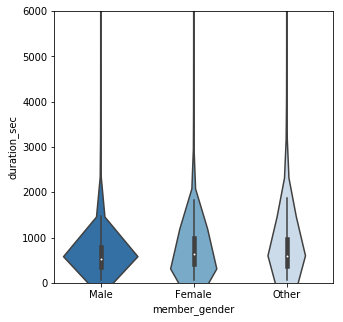

In [64]:
#violin plot of member_gender vs duration_sec
plt.figure(figsize=(5,5))
plt.ylim(1,6000)
sb.violinplot(x = 'member_gender', y = 'duration_sec', data = df_clean, palette = 'Blues_r');

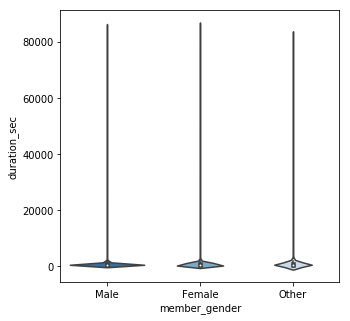

In [65]:
#violin plot of member_gender vs duration_sec
plt.figure(figsize=(5,5))
sb.violinplot(x = 'member_gender', y = 'duration_sec', data = df_clean, palette = 'Blues_r');

**Result**

From the result in the violin plot we can see that males tend to take longer trips than the remaining genders.

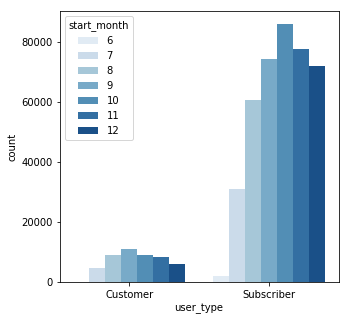

In [66]:
#count plot of user_type vs start_month
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'user_type', hue = 'start_month', palette = 'Blues');

**Result**

From the violin plot that is charting start month and user type, we can see that the subscribers had a significantly larger amount of trips from August to December more than June to July with the peak in October.

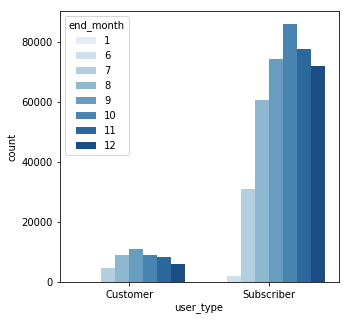

In [67]:
#count plot of user_type vs end_month
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'user_type', hue = 'end_month', palette = 'Blues');

**Result**

This plot is showing a similar view as the previous visualization for the start month. We can see that the subscribers had a significantly larger amount of trips from August to December more than June to July with the peak in October.

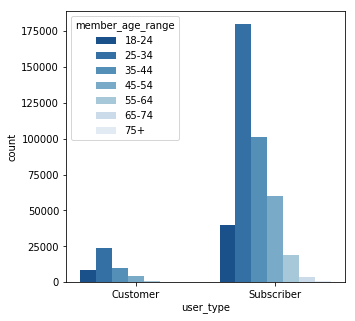

In [68]:
#count plot of user_type vs member_age_range
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'user_type', hue = 'member_age_range', palette = 'Blues_r');

**Result**

The result of the plot, in terms of user type and age range, the amount of trips by subscribers are larger than the amount of trips by customers in every age range category. We can also see how much larger the 25-34 range is than all the other categories.

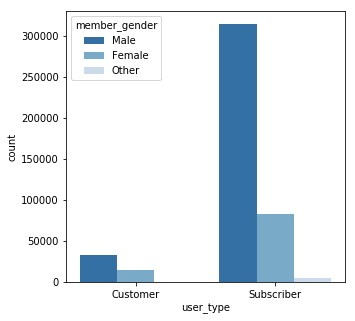

In [69]:
#count plot of user_type vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'user_type', hue = 'member_gender', palette = 'Blues_r');

**Result**

The result of the plot, in terms of user type and gender, the amount of trips by subscribers of male and females is larger than the ones in customers. Male subscribers had significantly more trips than other genders.

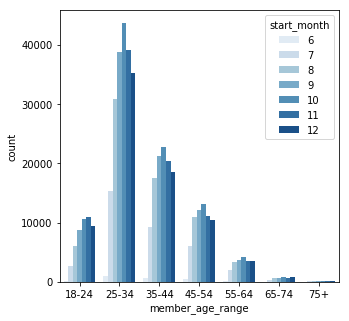

In [70]:
#count plot of member_age_range vs start_month
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'member_age_range', hue = 'start_month', palette = 'Blues');

**Result**

The result of the plot, in terms of age and the start month category, we can see that the maximum amount of trips was in October in almost every age range, except 18-24, 65-74, and 75+. 

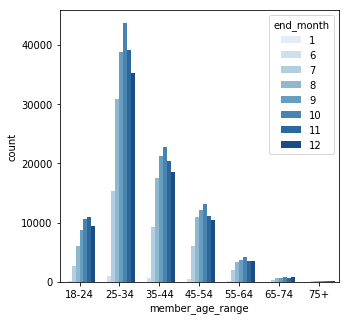

In [71]:
#count plot of member_age_range vs end_month
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'member_age_range', hue = 'end_month', palette = 'Blues');

**Result**

The result of the plot, in terms of age and the start month category, we can see that the maximum amount of trips was in October in almost every age range, except 18-24, 65-74, and 75+. 

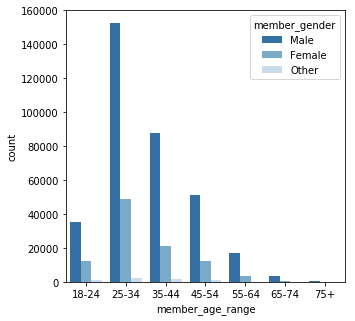

In [72]:
#count plot of member_age_range vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'member_age_range', hue = 'member_gender', palette = 'Blues_r');

**Result**

The count plot, in terms of age range and gender, we can see that male users had the largest amount of trips in each age range. But the biggest difference was in the 25-34 age range.

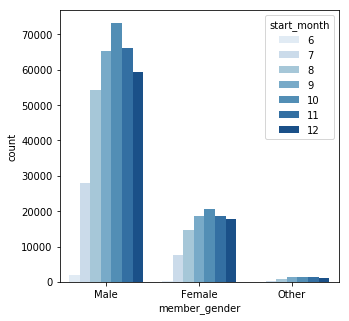

In [73]:
#count plot of member_age_range vs start_month
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'member_gender', hue = 'start_month', palette = 'Blues');

**Result**

The result of the plot, in terms of gender and start month category, we can see that the maximum amount of trips was in october for male and females, but for the other gender category, the columns had no noticable variation between the months.

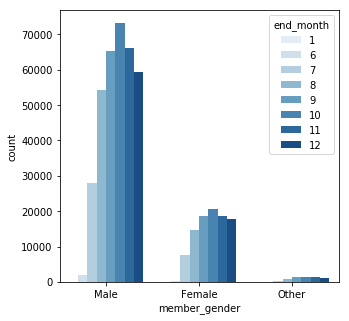

In [74]:
#count plot of member_age_range vs end_month
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'member_gender', hue = 'end_month', palette = 'Blues');

**Result**

The result of the plot, in terms of gender and end month category, we can see that the maximum amount of trips was in october for male and females, but for the other gender category, the columns had no noticable variation between the months.

#### Do people end trips where they started?

In [75]:
circle = df_clean.query('start_station_id == end_station_id').count()[1]
circle

2.2332117424568416

In [76]:
non_circle = df_clean.query('start_station_id != end_station_id').count()[1]
non_circle

97.76678825754315

In [77]:
y_values = [circle, non_circle]
x_values = ['circle', 'non_circle']

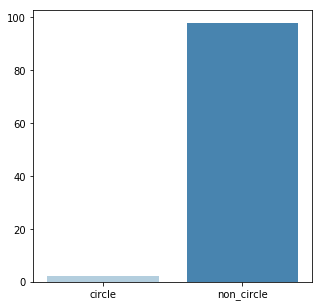

In [78]:
plt.figure(figsize = [5, 5])
sb.barplot(x = x_values, y = y_values, palette = 'Blues');

**Result**



From the chart, we can see that there were 2% of the people who returned bikes to the station they took them from.

#### What is the distribution of riders in terms of gender and age?

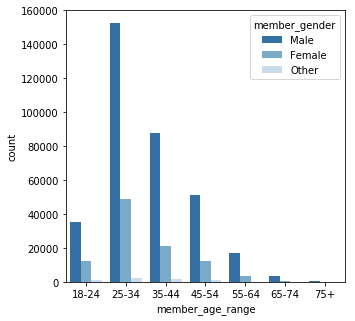

In [79]:
#count plot of member_age_range vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'member_age_range', hue = 'member_gender', palette = 'Blues_r');

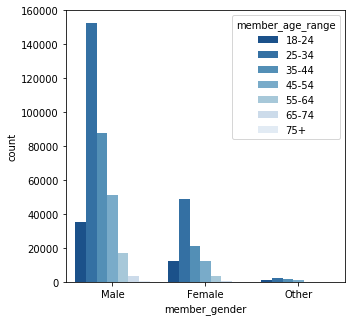

In [80]:
#count plot of member_age_range vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'member_gender', hue = 'member_age_range', palette = 'Blues_r');

**Result**

It looks like male riders are higher than female and other. The age range that is the greatest is the 25-34 range. In conjunction, the largest subsection is men from 25-34.

#### What is the proportion of subscribers vs customers for the age ranges?

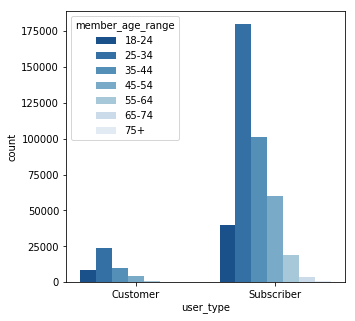

In [81]:
#count plot of user_type vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'user_type', hue = 'member_age_range', palette = 'Blues_r');

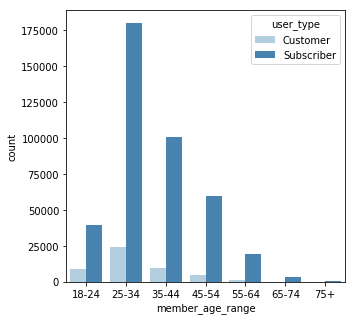

In [82]:
#count plot of user_type vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'member_age_range', hue = 'user_type', palette = 'Blues');

**Result**

It looks like we have more subscribers than customers, and the younger ages have more users. With the most users as subsribers in the 25-34 age range.

#### Which month had the most customers/subscribers?

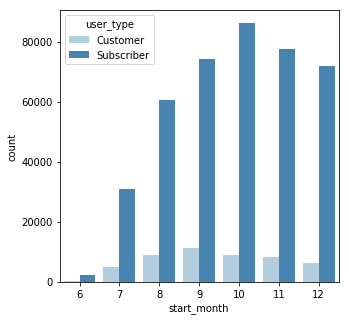

In [90]:
#count plot of user_type vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'start_month', hue = 'user_type', palette = 'Blues');

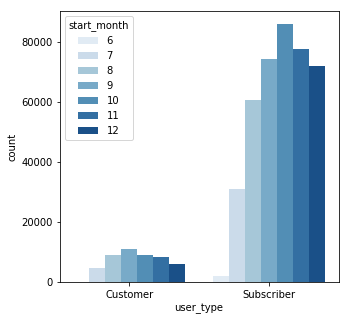

In [91]:
#count plot of user_type vs member_gender
plt.figure(figsize = [5, 5])
sb.countplot(data = df_clean, x = 'user_type', hue = 'start_month', palette = 'Blues');

**Result**

We can use this visualization that charts the months with the user type to see that the subscribers have more users and they skew towards the end of the end.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Similar to the previous univariate visualiztions done for user type, age range, and gender, the highest count is always, whether for the start or the end, occurs in October for the members of user type subscribers, the members who are between 25-34 years old, and the members who are male.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Alike the univariate visualization results, it is interesting to see the age range 25-34 years old as the highest count comparing to the youngest generation in which I categorized is 18-24 years old. Also, the gender was expected to be somewhat similar for all types but surprisingly male members are the highest in terms of the amount of trips across all sections.

## Multivariate Exploration

Create plots of three or more variables to investigate your data even
further.

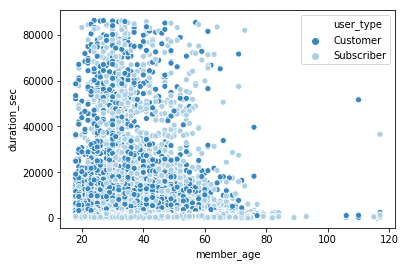

In [83]:
#scatter plot of member_age by duration and user_type
sb.scatterplot(data = df_clean, x = 'member_age', y = 'duration_sec', hue = 'user_type', palette = 'Blues_r');

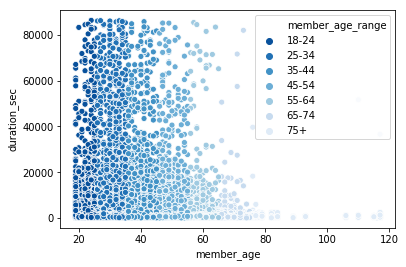

In [84]:
#scatter plot of member_age by duration and member_age_range
sb.scatterplot(data = df_clean, x = 'member_age', y = 'duration_sec', hue = 'member_age_range', palette = 'Blues_r');

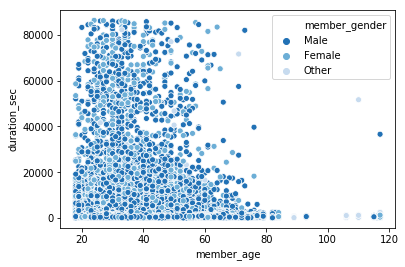

In [85]:
#scatter plot of member_age by duration and member_gender
sb.scatterplot(data = df_clean, x = 'member_age', y = 'duration_sec', hue = 'member_gender', palette = 'Blues_r');

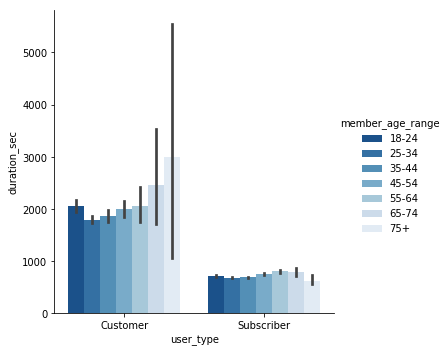

In [86]:
#cat plot of user_type by duration_sec and member_age_range
sb.catplot(data = df_clean, x = 'user_type', y = 'duration_sec', hue = 'member_age_range', palette = 'Blues_r', kind = 'bar');

The result of the cat plot, which shows terms of user type + age range + duration, shows that longer trips took place by customers of all ages but specially for customers who are age 75+.

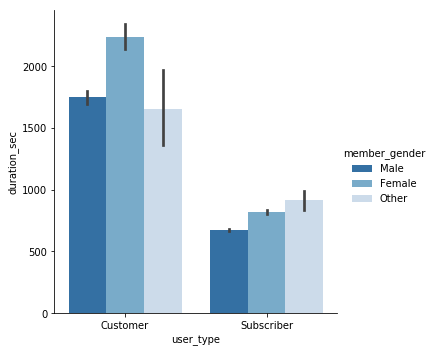

In [87]:
#cat plot of user_type by duration_sec and member_gender
sb.catplot(data = df_clean, x = 'user_type', y = 'duration_sec', hue = 'member_gender', palette = 'Blues_r', kind = 'bar');

The result of the cat plot, which shows terms of user type + gender + duration, shows that longer trips took place by customers of all genders but specially for customers who are afemale had the highest jump.

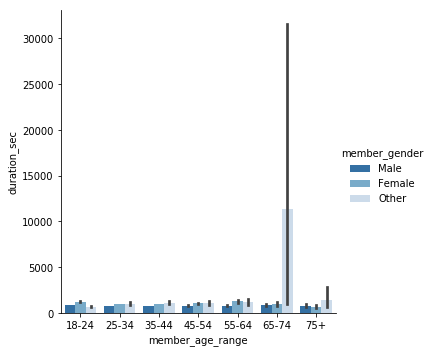

In [88]:
# cat plot of member_age_range by duration_sec and member_gender
sb.catplot(data = df_clean, x = 'member_age_range', y = 'duration_sec',  hue = 'member_gender', palette = 'Blues_r', kind = 'bar');

The result of the cat plot, which shows terms of gender + age range + duration, shows no real variations in any of the combinations EXCEPT for the other gender of age 75+ which had a HUGE jump, possible variation or error.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I think looking at the data in this last section specifically for user type and gender I can say that my results were definitely strengthened. In the multivatiate section it shows different interpretations when combining that third element in the cat plots.

### Were there any interesting or surprising interactions between features?

This results from this section differ from the expectations I had in my mind before I started the exploration. Looking at the data now I can see some variations like how I can see mostly male subscribers between 25-34 tended to be the highest category in the univariate and bivariate charts. In the multivariate charts this fact didnt seem to matter much.